# COMM 4P35 - Web Archives Tutorial


This notebook uses a subset of the the data from the [COVID in Niagara Archive](https://archive-it.org/collections/13781). We'll use Google Collab to explore how some pages from the [canada.ca](https://canada.ca) domain have changed during the course of the pandemic.


In [157]:
# Loading in the the pieces

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

import difflib
from IPython import display

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.

We'll load up the CSV file that is a subset of the data from that Archive mentioned above. We'll display 1 random entries from this CSV.

In [139]:
web_page_text = pd.read_csv("snap_shot_canada_ca.csv")

web_page_text['crawl_date']= pd.to_datetime(web_page_text['crawl_date'],format='%Y%m%d')
#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in web_page_text.iterrows():
    web_page_text.at[index, "length"] = len(web_page_text.at[index,"content"])
web_page_text.sample(1)

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,length
1101,2021-05-21,canada.ca,https://www.canada.ca/en/health-canada/services/drugs-health-products/covid19-industry/drugs-vaccines-treatments/vaccines.html,text/html,text/html,en,"COVID-19 Vaccines: Authorized vaccines - Canada.ca Skip to main content Skip to ""About government"" Language selection Français fr / Gouvernement du Canada Search Search Canada.ca Search Menu Main Menu Jobs and the workplace Immigration and citizenship Travel and tourism Business and industry Benefits Health Taxes Environment and natural resources National security and defence Culture, history and sport Policing, justice and emergencies Transport and infrastructure Canada and the world Money and finances Science and innovation You are here: Canada.ca Coronavirus disease (COVID-19) COVID-19 health product industry COVID-19 Drugs and vaccines Vaccines for COVID-19: Authorized vaccines Information on COVID-19 vaccines including authorized vaccines, types of vaccines and on-going safety monitoring Most requested How to get vaccinated Vaccine shipments and deliveries Reported side effects following COVID-19 vaccination Vaccines and treatments for COVID-19: Progress List of authorized drugs, vaccines and expanded indications Number of people vaccinated Authorized vaccines Moderna COVID-19 vaccine About the vaccine, how it works, how it is given, ingredients, allergies, possible side effects, safety monitoring Pfizer-BioNTech COVID-19 vaccine About the vaccine, how it works, how it is given, ingredients, allergies, possible side effects, safety monitoring AstraZeneca COVID-19 vaccine About the vaccine, how it works, how it is given, ingredients, allergies, possible side effects, safety monitoring Janssen COVID-19 vaccine About the vaccine, how it works, how it is given, ingredients, allergies, possible side effects, safety monitoring Types of vaccines mRNA vaccines About mRNA vaccines, how they work, safety, effectiveness, monitoring Viral vector-based vaccines About viral vector-based vaccines, how they work, safety, effectiveness, monitoring Did you find what you were looking for? Yes No If not, tell us why: What was wrong? I can't find the information The information is hard to understand There was an error or something didn't work Other reason Please provide more details You will not receive a reply. Telephone numbers and email addresses will be removed. Maximum 300 characters Submit Thank you for your feedback Date modified: 2021-05-12 About government Contact us Departments and agencies Public service and military News Treaties, laws and regulations Government-wide reporting Prime Minister About government Open government About this site Social media Mobile applications About Canada.ca Terms and conditions Privacy Top of page",2569.0


In [216]:
print("Total number of web pages captures in this archive subset: " + str(len(web_page_text)))

Total number of web pages captures in this archive subset: 1345


## Step 2 

Let's look at how many times the top 25 URLs in this archive have been crawled. 

In [200]:
web_page_text.groupby(["url"]).count().sort_values(by="crawl_date",ascending=False)[0:25]

,crawl_date,domain,mime_type_web_server,mime_type_tika,language,content,length
url,,,,,,,
https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html,71,71,71,71,71,71,71
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html,70,70,70,70,70,70,70
https://www.canada.ca/en/department-finance/economic-response-plan.html,69,69,69,69,69,69,69
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/symptoms.html,68,68,68,68,68,68,68
https://www.canada.ca/en.html,68,68,68,68,68,68,68
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks.html,66,66,66,66,66,66,66
https://www.canada.ca/en/department-finance/news/2020/03/canadas-covid-19-economic-response-plan-support-for-canadians-and-businesses.html,66,66,66,66,66,66,66
https://www.canada.ca/en/crown-indigenous-relations-northern-affairs.html,65,65,65,65,65,65,65
https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html?utm_campaign=not-applicable&utm_medium=vanity-url&utm_source=canada-ca_covid-19,55,55,55,55,55,55,55


## Step 3

Let's look at a specific URL.

In [213]:
URL = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html"

... with that set, let's plot out the change in content length of that page

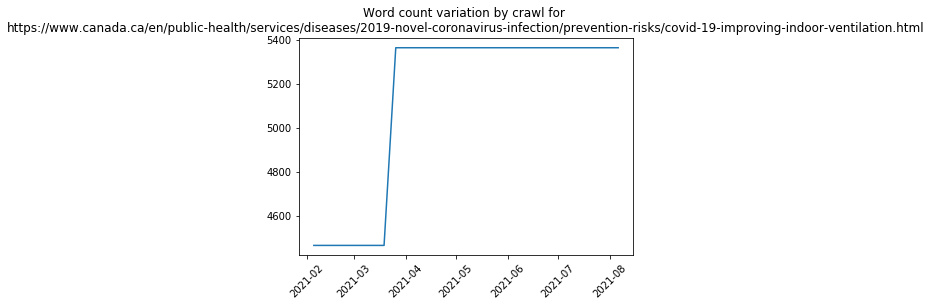

In [214]:
url_data = web_page_text[web_page_text['url'] == URL].sort_values(by="crawl_date")

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for \n" + URL)
plt.show()
#print("On internet archive: ", "https://web.archive.org/web/*/"+URL)


### Step 4

Let's look at the different in text between the hightest word count and the lowest based on the Internet Archive version of each page

In [215]:
max_page = url_data[url_data['length'] == url_data['length'].max()]
max_page_date = str(max_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nLongest version of this page on the Internet Archive was captured "\
      + max_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + max_page_date + "/" + URL)



min_page = url_data[url_data['length'] == url_data['length'].min()]
min_page_date = str(min_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nShortest version of this page on the Internet Archive was captured "\
      + min_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + min_page_date + "/" + URL)




Longest version of this page on the Internet Archive was captured 20210326
Open this version on Internet Archive 
https://web.archive.org/web/20210326/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html


Shortest version of this page on the Internet Archive was captured 20210205
Open this version on Internet Archive 
https://web.archive.org/web/20210205/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html
